In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
matplotlib.rcParams['savefig.dpi'] = 144

In [3]:
import pandas as pd

 
# Sắp xếp dữ liệu

**Đọc dữ liệu từ tập tin** 

Ta có thể tạo DataFrame bằng cách sử dụng dữ liệu được lưu trữ trong tệp hoặc nhận được từ một trang web. Nguồn dữ liệu có thể là JSON, HTML, CSV, Excel, Python pickle hoặc thậm chí là kết nối cơ sở dữ liệu. Mỗi định dạng sẽ có các phương thức riêng để đọc và ghi dữ liệu nhận các đối số khác nhau. Các đối số của các phương thức này thường phụ thuộc vào định dạng cụ thể của tệp. Ví dụ: các giá trị trong CSV có thể được phân tách bằng dấu phẩy hoặc dấu chấm phẩy, có thể có tiêu đề hoặc có thể không.

Phương thức read_csv phải xử lý hầu hết các khả năng định dạng, vì vậy chúng ta sẽ khám phá phương thức đó bằng một vài ví dụ. Cố gắng áp dụng những ý tưởng này khi làm việc với các định dạng tệp khác, nhưng hãy nhớ rằng mỗi định dạng và phương pháp đọc là khác nhau. Luôn kiểm tra tài liệu của Pandas khi gặp sự cố đọc hoặc ghi dữ liệu.

In [4]:
# Read file 
df1 = pd.read_csv('../data/customers.csv')
 
df1

,id,name,billing_country
0,1,Serenity Ladner,Canada
1,2,Lucy Baldwin,Canada
2,5,Skylar Coffman,USA
3,6,Riley Kinsey,USA
4,7,Heidi Spurlock,Canada
...,...,...,...
514,2080,Dang Sinh,Vietnam
515,2082,Pham Phuc,Vietnam
516,2084,Bui Tuan,Vietnam
517,2095,Ngo Vuong,Vietnam


**Lọc dữ liệu (filtering)**

Tập dữ liệu có cột `'billing_country'`. Nếu chỉ quan tâm đến các doanh nghiệp ở Hoa Kỳ, ta có thể lọc DataFrame và chỉ chọn dữ liệu đó (USA).



In [5]:
 print(df1[df1['billing_country'] == 'USA'])
#usa_df

       id              name billing_country
2       5    Skylar Coffman             USA
3       6      Riley Kinsey             USA
8      18        Abigail Le             USA
9      22      Alana Herzog             USA
11     31   Katherine Lilly             USA
17     49       Amelia Sosa             USA
245  1050     Carlos Krause             USA
248  1053      Jesus Luther             USA
249  1060    Jorge Peterson             USA
251  1064    Hunter Sherman             USA
252  1065  Braylon  Crowder             USA
255  1069     Kaiden Ocampo             USA
256  1070       Seth Bowden             USA
264  1091  Antonio Calloway             USA
265  1094  Damian Schaeffer             USA


In [9]:
sorted_df = df1.sort_values('billing_country')
print(sorted_df)
partial_df =  df1[df1['id']>= 100][["name", "billing_country"]]  
partial_df.head()

       id                name billing_country
344  1442         Jan Lakatos         Albania
441  1797       Zinnah Omondi         Algeria
437  1792  Flomo Gebremichael         Algeria
435  1785        Momolu Okeke         Algeria
424  1765         Wleh Atieno         Algeria
..    ...                 ...             ...
139   566      Kareema Anvari           Yemen
137   559       Thana Mualimi           Yemen
430  1780       Fokra Berhane        Zimbabwe
167   703      Nichelle Gashi        Zimbabwe
183   732          Bikita Sow        Zimbabwe

[519 rows x 3 columns]


,name,billing_country
24,Arabelle Perrin,France
25,Azalais LabanDe_Labaye,France
26,Yolande Montrosier,France
27,Claudia Canete Orteguilla,Spain
28,Naroa Miralles Edinho,Spain


### Hoạt động của bộ lọc: 

Khi chúng tôi viết `df1['billing_country'] == 'USA'`, Pandas chọn cột `'billing_country'` và kiểm tra xem mỗi hàng có phải là `'USA'` hay không. Nếu có, hàng đó được đánh dấu `True` và nếu không, nó được đánh dấu `False`. Đây là cách chúng ta thường mong đợi một điều kiện hoạt động, hiện chỉ được áp dụng cho toàn bộ Pandas `Series`. Chúng tôi kết thúc với một Pandas `Series` các biến Boolean.

In [11]:
(df1['billing_country'] == 'USA').head()

0    False
1    False
2     True
3     True
4    False
Name: billing_country, dtype: bool

## Áp dụng hàm và tổng hợp dữ liệu

Để phân tích dữ liệu trong khung dữ liệu, chúng ta cần có khả năng áp dụng các hàm cho nó. Pandas đã tích hợp sẵn nhiều hàm toán học và DataFrames và Sê-ri có thể được chuyển đến các hàm NumPy (vì chúng hoạt động giống như mảng NumPy).

In [12]:
sal_df = pd.read_csv("../data/Salaries.csv")
sal_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


In [13]:
print(sal_df.head())
print(sal_df.shape)

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency  Status  
0  2011    NaN  San Francisc

Ví dụ:

- sử dụng hàm log() của Numpy để  tính giá trị logarith tự nhiên (base `e`).

- Sử dụng mean() để tính giá trị trung bình của 1 Series. 
...

In [14]:
log_review_count = np.log(sal_df['BasePay'])
print(log_review_count.head())
print(log_review_count.shape)
print(log_review_count.describe())

0    12.028208
1    11.957393
2    12.267822
3    11.263387
4    11.808588
Name: BasePay, dtype: float64
(148654,)
count    1.480340e+05
mean             -inf
std               NaN
min              -inf
25%      1.042226e+01
50%      1.108230e+01
75%      1.145837e+01
max      1.267381e+01
Name: BasePay, dtype: float64


F:\Software\installed\anaconda\src\envs\big_data\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
F:\Software\installed\anaconda\src\envs\big_data\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
mean_review_count = sal_df['BasePay'].mean()
print(mean_review_count)

66325.4488404877


### Tổng hợp dữ liệu với groupby

Tổng hợp dữ liệu là một thuật ngữ bao hàm cả việc tóm tắt dữ liệu (như trên) và việc kết hợp các tập dữ liệu khác nhau.

       Với dữ liệu 'Salaries', ta có thể quan tâm đến việc so sánh tiền lương ở các chức danh công việc khác nhau. Chúng tôi có thể tính xếp hạng lương trung bình (`TotalPay`) cho mỗi chức danh công việc `JobTitle` và điều này sẽ cho phép ta dễ dàng so sánh chúng. Trước tiên, phải chia nhỏ dữ liệu theo `JobTitle`, tính giá trị trung bình cho từng công việc và sau đó kết hợp lại khi kết thúc. Quy trình này được gọi là [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html) và là một ví dụ cổ điển về tổng hợp dữ liệu (theo nghĩa của cả dữ liệu tóm tắt và cũng kết hợp các bộ dữ liệu khác nhau).
       
    Ta đạt được sự phân tách và kết hợp lại bằng phương pháp `groupby`.

In [16]:
sal_by_job = sal_df.groupby('JobTitle')['TotalPay'].mean().rename('mean_totalPay')
sal_by_job.reset_index()

,JobTitle,mean_totalPay
0,ACCOUNT CLERK,44035.664337
1,ACCOUNTANT,47429.268000
2,ACCOUNTANT INTERN,29031.742917
3,"ACPO,JuvP, Juv Prob (SFERS)",62290.780000
4,ACUPUNCTURIST,67594.400000
...,...,...
2154,X-RAY LABORATORY AIDE,52705.880385
2155,X-Ray Laboratory Aide,50823.942700
2156,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000
2157,Youth Comm Advisor,41414.307500


In [17]:
# Now describe to find the max, min ... of the average salaries
sal_by_job.describe()

count      2159.000000
mean      86029.668119
std       46330.433920
min           0.000000
25%       57740.678422
50%       78914.370556
75%      106500.783045
max      399211.275000
Name: mean_totalPay, dtype: float64

In [18]:
sal_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Sắp xếp giá trị 

Nếu chúng ta muốn sắp xếp khung dữ liệu với cột/tính năng này, chúng ta có thể sử dụng phương thức `sort_values()`

In [19]:
# Sắp xếp các giá trị trong một cột 'TotalPay' theo thứ tự  tăng dần
sorted_total_pay = sal_df[['Id', 'EmployeeName', 'JobTitle', 'TotalPay']].sort_values('TotalPay')
sorted_total_pay.head()

,Id,EmployeeName,JobTitle,TotalPay
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",-618.13
106745,106746,Tiffany M Rasso,Recreation Director,0.00
106746,106747,Bertha Robinson,Transit Operator,0.00
106747,106748,Kermith T Miller,Utility Plumber,0.00
106748,106749,Rita I Sinasohn-Pharr,Clerk Typist,0.00


In [20]:
#  Sắp xếp các giá trị trong một cột cụ thể theo thứ tự giảm dần (by adding `ascending = False`)
sorted_total_pay2 = sal_df[['Id', 'EmployeeName', 'JobTitle', 'TotalPay']].sort_values('TotalPay', ascending = False)
sorted_total_pay2.head()

,Id,EmployeeName,JobTitle,TotalPay
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),538909.28
110531,110532,David Shinn,Deputy Chief 3,471952.64
110532,110533,Amy P Hart,Asst Med Examiner,390111.98
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",362844.66


### Lưu ý:

Hầu hết các hoạt động của Pandas đều trả về một bản sao của DataFrame và không cập nhật DataFrame tại chỗ (trừ khi chúng ta yêu cầu)!

Ví dụ: Xóa cột `Notes` trực tiếp trong sal_df, gán tùy chọn `inplace=True` (mặc định là False)

In [16]:
sal_df.drop(['Notes'], axis=1, inplace=True)

sal_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


## Nhập các khung dữ liệu

In [21]:
import numpy as np

In [25]:
df1 = pd.DataFrame(np.arange(0,20).reshape(5,4), columns = ['A', 'B', "C", "D"])

In [23]:
df1

,A,B,C,D
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [26]:
df2 = pd.DataFrame(np.arange(0,12).reshape(4,3), columns = ['A', "D", "F"])
df2

,A,D,F
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [30]:
joined1 = pd.concat([df1,df2]).fillna(value=0,axis = 0)
joined1

,A,B,C,D,F
0,0,1.0,2.0,3,0.0
1,4,5.0,6.0,7,0.0
2,8,9.0,10.0,11,0.0
3,12,13.0,14.0,15,0.0
4,16,17.0,18.0,19,0.0
0,0,0.0,0.0,1,2.0
1,3,0.0,0.0,4,5.0
2,6,0.0,0.0,7,8.0
3,9,0.0,0.0,10,11.0


In [28]:
joined2 =  pd.concat([df1,df2], join = 'outer').fillna(value = 0, axis = 0)
joined2 

,A,B,C,D,F
0,0,1.0,2.0,3,0.0
1,4,5.0,6.0,7,0.0
2,8,9.0,10.0,11,0.0
3,12,13.0,14.0,15,0.0
4,16,17.0,18.0,19,0.0
0,0,0.0,0.0,1,2.0
1,3,0.0,0.0,4,5.0
2,6,0.0,0.0,7,8.0
3,9,0.0,0.0,10,11.0


In [33]:
joined2 == joined1

,A,B,C,D,F
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True


In [34]:
joined3 =  pd.concat([df1,df2], join = 'inner').fillna(value = 0, axis = 0)
joined3

,A,D
0,0,3
1,4,7
2,8,11
3,12,15
4,16,19
0,0,1
1,3,4
2,6,7
3,9,10


### Trực quan dữ liệu trong Pandas

Pandas cung cấp hàm plot() và hist() để biểu diễn trực quan dữ liệu.

<Axes: >

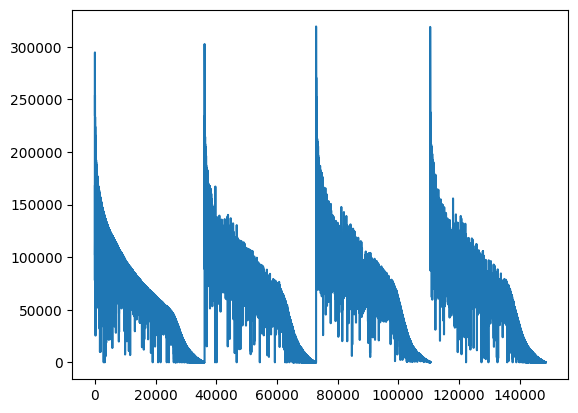

In [35]:
sal_df['BasePay'].plot()

# Bài tập thực hành


Bài 1. Hãy dùng hàm `groupby` để hiển thị trung bình lương (TotalPay) theo năm (Year). 

Bài 2. Hãy dùng hàm `groupby` để hiển thị tổng lương (TotalPay) theo năm. Sắp xếp theo thứ tự giảm dần.

Bài 3. Hiển thị số lượng công việc khác nhau trong dataframe `sal_df`.

Bài 4. Điền giá trị 0.0 cho các ô trống trong `sal_df`.

Bài 5. Tìm tên nhân viên có mức lương cao 

Bài 6. Vẽ đồ thị dạng histogram của tiền lương ngoài giờ (OvertimePay).

Bài 7. Hợp nhất 2 df từ 2 bảng `orders` và `customers` theo các customer_id.